<a href="https://colab.research.google.com/github/saurabh423/Face_Emotion_Recognition/blob/main/(Self_Notebook)Face_emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**

**Live Class Monitoring System(Face Emotion Recognition)**

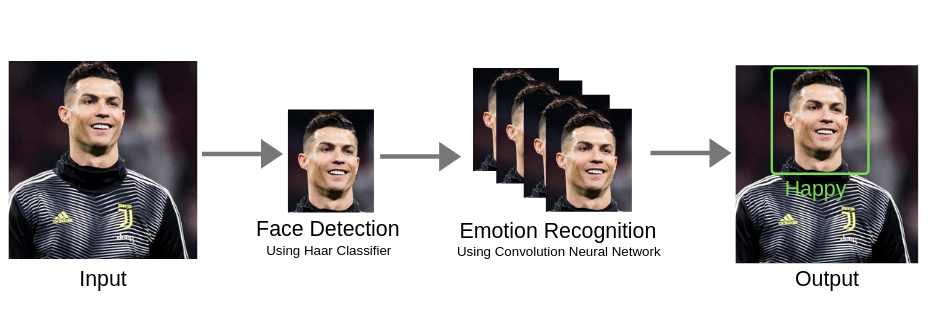

# **Project Introduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.


In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


# **Problem Statements**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.

The solution to this problem is by recognizing facial emotions.


# **Dataset Information:**

I have built a deep learning model which detects the real time emotions of students through a webcam so that teachers can understand if students are able to grasp the topic according to students' expressions or emotions and then deploy the model. The model is trained on the FER-2013 dataset .This dataset consists of 35887 grayscale, 48x48 sized face images with seven emotions - angry, disgusted, fearful, happy, neutral, sad and surprised.

# **What is Face Emotion Recognition?**

Facial emotion recognition is the process of detecting human emotions from facial expressions. The human brain recognizes emotions automatically, and software has now been developed that can recognize emotions as well.

# **Importing Libraries**


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##For Models ##
import keras
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.utils import np_utils
from keras.regularizers import l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D,concatenate
from keras.models import Model
from tensorflow.keras import layers
from keras.applications.inception_v3 import InceptionV3
from keras.models import load_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Parameters

In [ ]:
# Defining the parameters used in this project
batch_size = 32
num_epochs = 70
input_shape = (48, 48, 1)
validation_split = .2
verbose = 1
num_classes = 7
base_path = 'models/'
shape_x = 48
shape_y = 48
image_size=(48,48)

# **Reading the Data**

###Connecting to the google drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Almabetter/Module 6: Deep Learning/Capstone Project-5: Face Emotion Recognition/dat/

/content/gdrive/MyDrive/Almabetter/Module 6: Deep Learning/Capstone Project-5: Face Emotion Recognition/dat


In [ ]:
import tarfile
# Converting our data from tar file to csv file
fname = 'fer2013.tar.gz'
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [ ]:
# Reading CSV file
df = pd.read_csv('/content/gdrive/MyDrive/Almabetter/Module 6: Deep Learning/Capstone Project-5: Face Emotion Recognition/dat/fer2013/fer2013.csv')

In [ ]:
# Return the first 5 rows.
df.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [ ]:
# First Look
print("Shape of the data = ", df.shape)
print("Printing columns of data = ", df.columns)

Shape of the data =  (35887, 3)
Printing columns of data =  Index(['emotion', 'pixels', 'Usage'], dtype='object')


The emotion variable represents emotions and is our target variable. Pixels variable expresses the value per pixel in the photos. Usage, on the other hand, shows which set the row it belongs to (such as training and testing).

Let's look at our training and test sets and separate these sets.

In [ ]:
# Value counts on each set
df["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


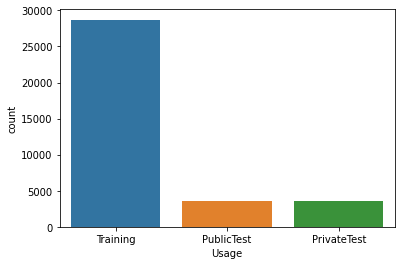

In [ ]:
# Let's plot the count of each set
sns.countplot(df.Usage)
plt.show()

**Let's look at the distribution of target variable**

In [ ]:
# Return unique values emotion
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
# Dictionary mapping for individual emotions
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


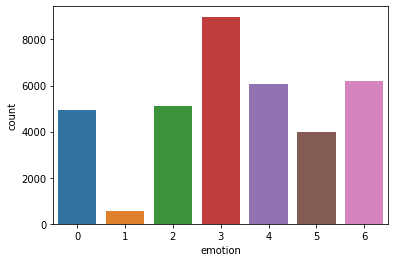

In [ ]:
# Plotting distribution of emotions
sns.countplot(df.emotion)
plt.show()

From above plot we can observe that majority of the classes belongs to **3:Happy**, **4:Sad** and **6:Neutral** on the otherside **1:disgust** and **5:surprise** are less in classes.


# **Displaying Images**

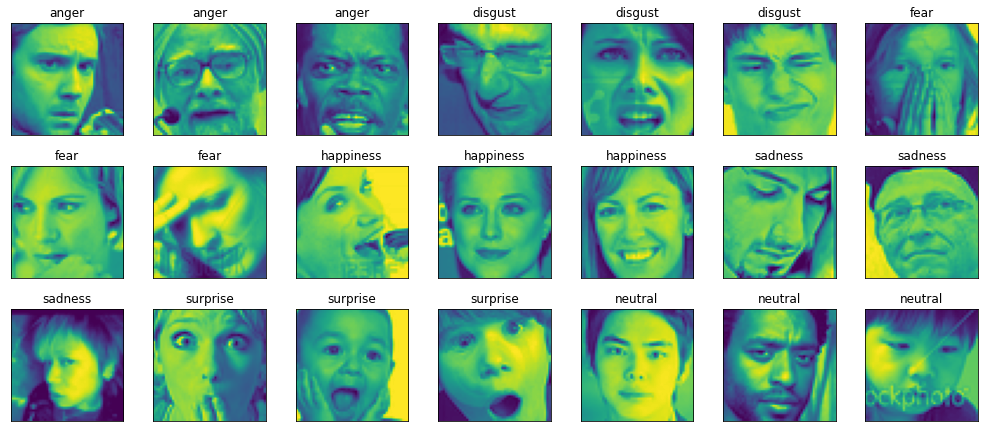

In [ ]:
# Visulize sample dataset
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

## Preprocessing

In [ ]:
df['pixels']=df['pixels'].astype("string") #converting dtype of pixels to string
pixels = df['pixels'].tolist() #Making list of pixels
width, height = 48, 48 # initializing image shape
faces = [] #Empty list
# Making images as required for our models  
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.strip().split(' ',48*48)]
    face = np.asarray(face).reshape(width, height)
    face = cv2.resize(face.astype('uint8'),image_size)
    faces.append(face.astype('float32'))
# Converting to array and dimension for transfer Learning
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 127.5 # normalizing the faces
faces -= 1.
# Converting Emotions to numpy array
emotions = pd.get_dummies(df['emotion']).to_numpy()

## Data Augmentation

**Data Augmentation**:- taking the batch and apply some series of random transformations (random rotation, resizing, shearing) to increase generalizability of model.

In [ ]:
# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=False,#Set input mean to 0 over the dataset, feature-wise.
                        featurewise_std_normalization=False,# Divide inputs by std of the dataset, feature-wise.
                        rotation_range=10,      # randomly rotate images in the range (degrees, 0 to 180)
                        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                        height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
                        zoom_range=.1,          # randomly zoom into images
                        horizontal_flip=True)   # randomly flip images

**ImageDataGenerator**

horizontal and vertical shift => moving all pixels of image in one direction

1. width_shift_range ( horizonatal shift)

2. height_shift_range (vertical shift)
3. floating num [0- 1] --> % of shift

*  horizontal n vertical flips augmentation ==>reversing rows or cols of pixels --> True or False

*  Random rotation --> 0 - 360 degrees --> rotation_range = 90 ==> means random rotation to image blw 0 and 90 degrees
*  random brightness --> randomly darkens or brightens images ==> brightness_range =[0.2,1.0] --> means darkens or brightens if pixel is blw 0.2 and 1
*  random zoom
1. either adds pixel or subtract pixels in image . [1-value, 1+value]
2. for example , zoom_range = .3 --> range [0.7, 1.3] or blw 70%(zoom in) and 130% (zoomout)


# **Splitting data into train and test datset**

In [ ]:
#train test split
xtrain, xtest,ytrain,ytest = train_test_split(faces, emotions,test_size=0.3,shuffle=True)
xval,xtest,yval,ytest=train_test_split(xtest,ytest,test_size=0.3,shuffle=True)

In [ ]:
# Checking shapes
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape, xval.shape, xtest.shape, yval.shape, ytest.shape

((25120, 48, 48, 1),
 (3231, 48, 48, 1),
 (25120, 7),
 (3231, 7),
 (7536, 48, 48, 1),
 (3231, 48, 48, 1),
 (7536, 7),
 (3231, 7))

## Method 1: Xception :
[PAPER](https://arxiv.org/pdf/1610.02357.pdf)

![](https://www.researchgate.net/publication/342580102/figure/fig3/AS:908305815830530@1593568390179/Schematic-diagram-of-the-Xception-model.png)

# Modelling

In [ ]:
# Defining entry flow
def entry_flow(inputs) :
    
    x = Conv2D(32, 3, strides = 2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64,3,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    previous_block_activation = x
    
    for size in [64, 128, 256] :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = MaxPooling2D(3, strides=2, padding='same')(x)
        
        residual = Conv2D(size, 1, strides=2, padding='same')(previous_block_activation)
        
        x = keras.layers.Add()([x, residual])
        previous_block_activation = x
    
    return x

In [ ]:
# Defining middle flow
def middle_flow(x, num_blocks=8) :
    
    previous_block_activation = x
    
    for _ in range(num_blocks) :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = keras.layers.Add()([x, previous_block_activation])
        previous_block_activation = x
    
    return x

In [ ]:
# Defining exit flow
def exit_flow(x, num_classes=7) :
    
    previous_block_activation = x
    
    x = Activation('relu')(x)
    x = SeparableConv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    
    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = keras.layers.Add()([x, residual])
      
    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    return x

In [ ]:
# creating input and output of model
inputs = Input(shape=(shape_x, shape_y, 1))
outputs = exit_flow(middle_flow(entry_flow(inputs)))

In [ ]:
# saving the model
xception = Model(inputs, outputs,name="Xception")

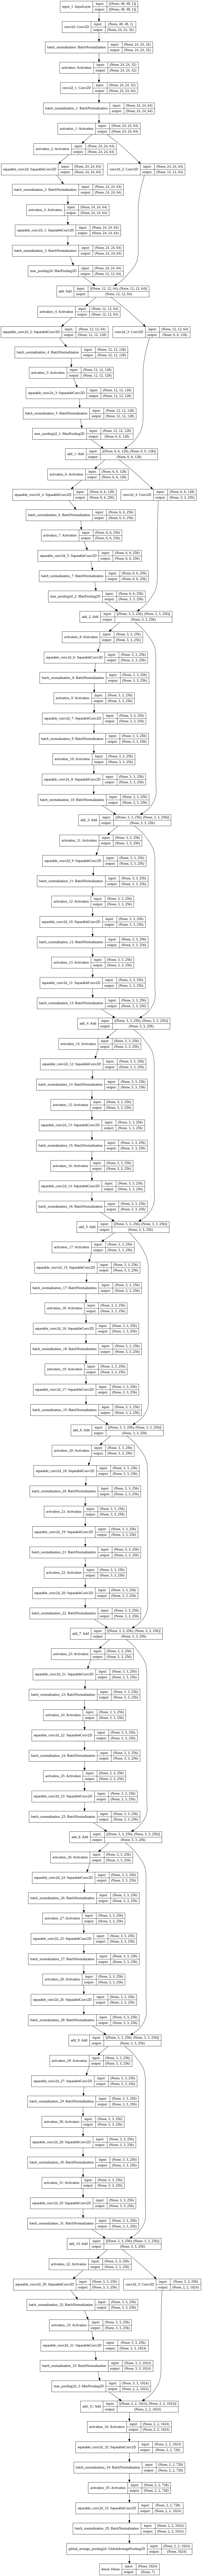

In [ ]:
# Plotting architecture of defined model
plot_model(xception, to_file='xception.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compiling the model
xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
xception.summary()  #gives the information about the architecture and configuration of the neural network.

Model: "Xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 24, 24, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 24, 24, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 24, 24, 32)   0           batch_normalization[0][0]        
___________________________________________________________________________________________

## CNN inspired by Goodfellow I.J
[PAPER](https://arxiv.org/pdf/1307.0414.pdf)

![](https://raw.githubusercontent.com/NJNischal/Facial-Expression-Recognition-with-CNNs/9999cbdaa55542e86e11a9e129bafcfb96bd0e60/model.png)

In [ ]:
# Building up Model Architecture
def CNN():
    model = Sequential()

    #1st CNN layer
    model.add(Conv2D(64,(3,3),padding = 'same', name='image_array', input_shape = (48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    #2nd CNN layer
    model.add(Conv2D(128,(5,5),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #3rd CNN layer
    model.add(Conv2D(512,(3,3),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #4th CNN layer
    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    #Fully connected 1st layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


    # Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_classes, activation='softmax'))

    return model



In [ ]:
CNN=CNN()

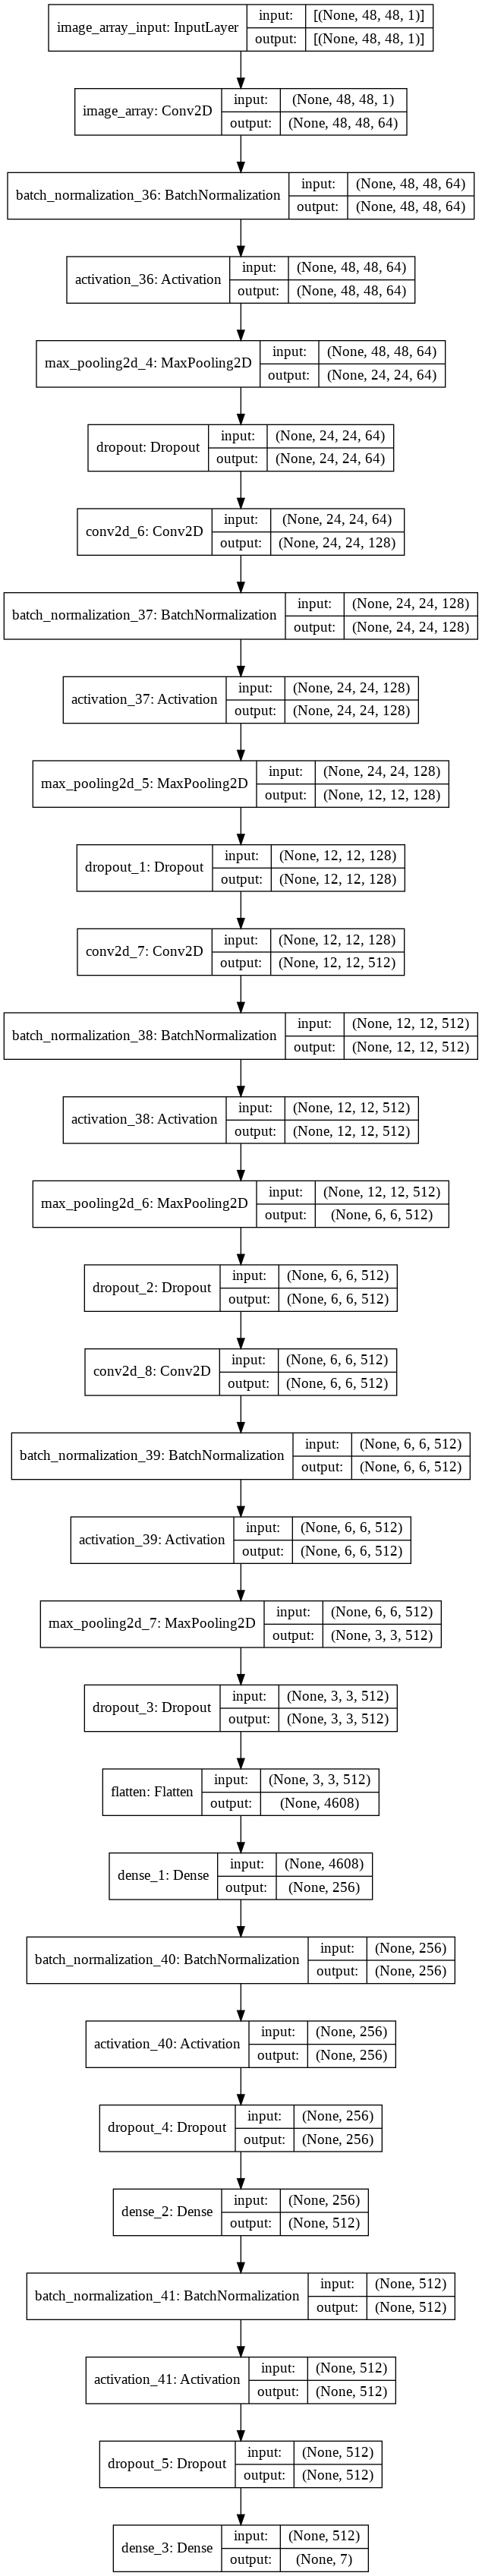

In [ ]:
# Plotting architecture of defined model
plot_model(CNN, to_file='CNN.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #using Adam Optimizer
CNN.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
CNN.summary() #gives the information about the architecture and configuration of the neural network.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_36 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_36 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 128)       5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Training 
## Xception

In [ ]:
# Fitting the Model with Training and Validation Data
early_stop = EarlyStopping('val_loss', patience=50, min_delta=0, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=int(50/4), min_delta=0.0001,model='auto')
trained_models_path = base_path + '_Xception'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
# Fitting the xception model
xception_history =xception.fit(data_generator.flow(xtrain, ytrain, batch_size),
          steps_per_epoch=len(xtrain) / batch_size, 
          epochs=num_epochs, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(xtest,ytest))

Epoch 1/70
785/785 [==============================] - 91s 67ms/step - loss: 1.6578 - accuracy: 0.3430 - val_loss: 1.7339 - val_accuracy: 0.3655

Epoch 00001: val_loss improved from inf to 1.73394, saving model to models/_Xception.01-0.37.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/70
785/785 [==============================] - 52s 66ms/step - loss: 1.4570 - accuracy: 0.4377 - val_loss: 1.7950 - val_accuracy: 0.3791

Epoch 00002: val_loss did not improve from 1.73394
Epoch 3/70
785/785 [==============================] - 51s 65ms/step - loss: 1.3502 - accuracy: 0.4856 - val_loss: 1.4958 - val_accuracy: 0.4819

Epoch 00003: val_loss improved from 1.73394 to 1.49577, saving model to models/_Xception.03-0.48.hdf5
Epoch 4/70
785/785 [==============================] - 51s 65ms/step - loss: 1.2948 - accuracy: 0.5076 - val_loss: 1.9216 - val_accuracy: 0.4466

Epoch 00004: val_loss did not improve from 1.49577
Epoch 5/70
785/785 [==============================] - 52s 66ms/step - loss: 1.2496 - accuracy: 0.5237 - val_loss: 1.5595 - val_accuracy: 0.4568

Epoch 00005: val_loss did not improve from 1.49577
Epoch 6/70
785/785 [==============================] - 51s 65ms/step - loss: 1.2118 - accuracy: 0.5371 - val_loss: 1.3286 - val_accuracy: 0.5101

Epoch 00006: val_los

It took around  **45 to 50** minutes to run all 70 epochs.
The training gave the accuracy of **72%** approx and val_accuracy of **64%.** 

It gives good prediction on train as well as test data.

Let's see the performance of Trained Deep CNN model.


# Trained Deep Convolutional Neural Network(CNN): 

In [ ]:
# Fitting the Model with Training and Validation Data
early_stop = EarlyStopping('val_loss', patience=50)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'CNN'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True, mode='max')
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
# Fitting the CNN model
CNN_history =CNN.fit(data_generator.flow(xtrain, ytrain, batch_size),
          steps_per_epoch=len(xtrain) / batch_size,
          epochs=num_epochs, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(xtest,ytest))

Epoch 1/70
785/785 [==============================] - 32s 38ms/step - loss: 1.9972 - accuracy: 0.2217 - val_loss: 1.7562 - val_accuracy: 0.2804

Epoch 00001: val_loss improved from -inf to 1.75617, saving model to models/CNN.01-0.28.hdf5
Epoch 2/70
785/785 [==============================] - 30s 38ms/step - loss: 1.8770 - accuracy: 0.2506 - val_loss: 1.6558 - val_accuracy: 0.3482

Epoch 00002: val_loss did not improve from 1.75617
Epoch 3/70
785/785 [==============================] - 29s 37ms/step - loss: 1.7855 - accuracy: 0.2949 - val_loss: 1.6745 - val_accuracy: 0.3504

Epoch 00003: val_loss did not improve from 1.75617
Epoch 4/70
785/785 [==============================] - 29s 37ms/step - loss: 1.7073 - accuracy: 0.3330 - val_loss: 1.6156 - val_accuracy: 0.4045

Epoch 00004: val_loss did not improve from 1.75617
Epoch 5/70
785/785 [==============================] - 29s 37ms/step - loss: 1.6337 - accuracy: 0.3619 - val_loss: 1.4953 - val_accuracy: 0.4287

Epoch 00005: val_loss did not

It took around **30-35** minutes to run all epochs.
The training gave the accuracy of **72%** and va_accuracy of **69%**. It seems quite good.



# **Plotting Accuracy & Loss**

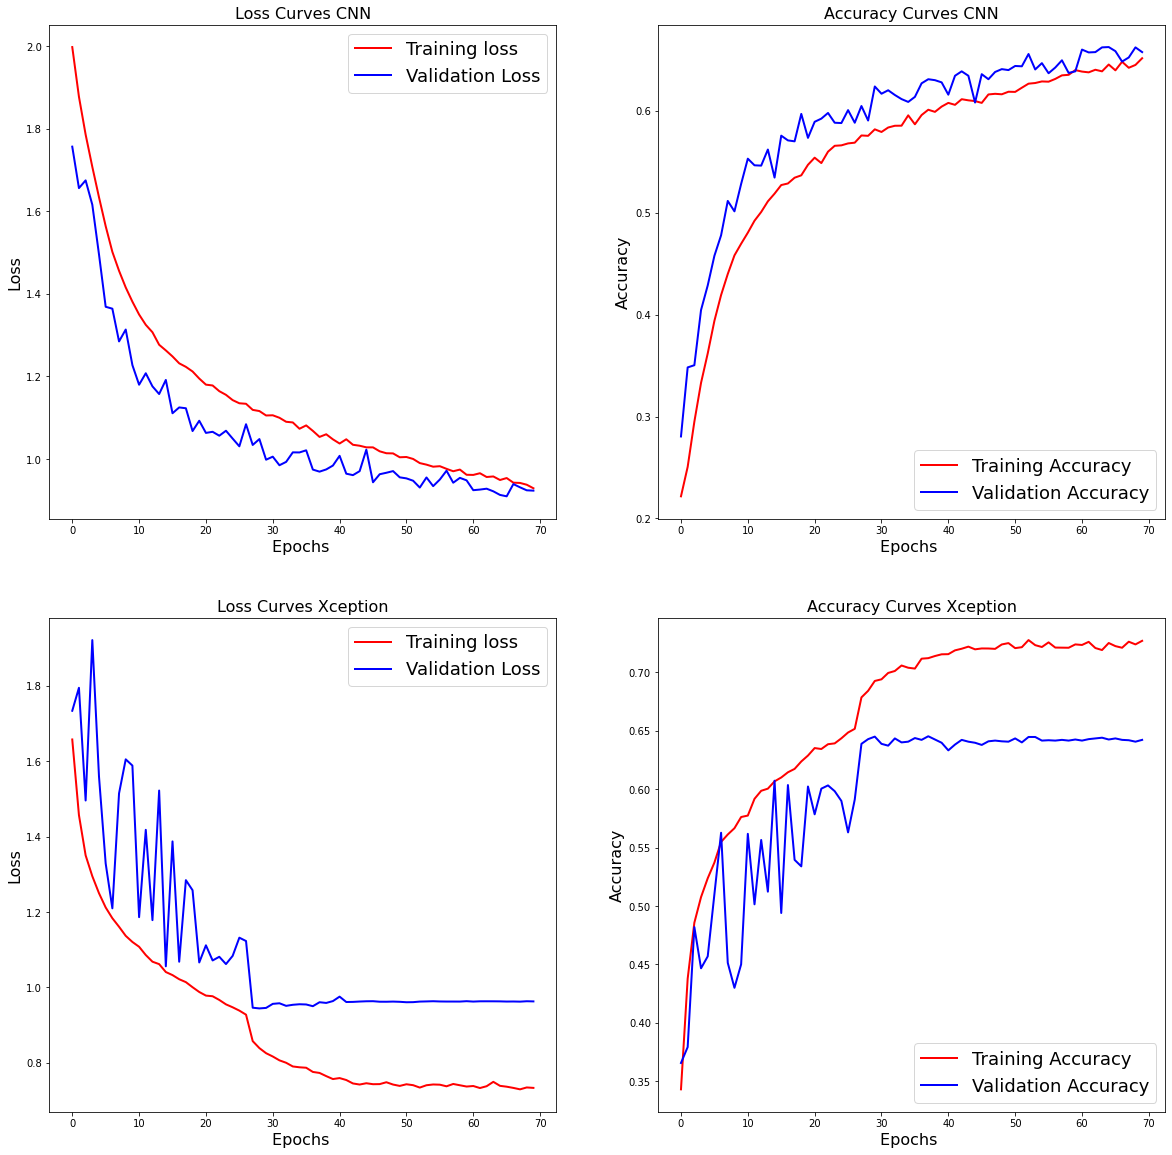

In [ ]:
# Plotting accuracy and loss curve for each model
fig,axes=plt.subplots(2,2,figsize=(20, 20))
for (m,history), ax in zip({'CNN':CNN_history,'Xception':xception_history}.items(),axes):
    # Loss Curves    
    ax[0].plot(history.history['loss'],'r',linewidth=2.0)
    ax[0].plot(history.history['val_loss'],'b',linewidth=2.0)
    ax[0].legend(['Training loss', 'Validation Loss'],fontsize=18)
    ax[0].set_xlabel('Epochs ',fontsize=16)
    ax[0].set_ylabel('Loss',fontsize=16)
    ax[0].set_title('Loss Curves '+m,fontsize=16)
 
    # Accuracy Curves
    ax[1].plot(history.history['accuracy'],'r',linewidth=2.0)
    ax[1].plot(history.history['val_accuracy'],'b',linewidth=2.0)
    ax[1].legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    ax[1].set_xlabel('Epochs ',fontsize=16)
    ax[1].set_ylabel('Accuracy',fontsize=16)
    ax[1].set_title('Accuracy Curves '+m,fontsize=16)

In [ ]:
# saving the plot
plt.savefig('plots.png')

<Figure size 432x288 with 0 Axes>

From above loss and accuracy plot it is seen that the accuracy & loss curve of **Trained Deep CNN** model is gradually increasing also the validation loss curve is below the training loss curve on the other hand the **Xception** shows the slightly lower accuracy compare to the trained CNN model.

# Classificastion Reports

In [ ]:
# Printing the classification report of all models
for model in [CNN,xception]:
    ypred=model.predict(xtest)
    ypred_=np.argmax(ypred, axis=1)
    ytest_=np.argmax(ytest, axis=1)
    print(classification_report(ytest_, ypred_,digits=3))

              precision    recall  f1-score   support

           0      0.555     0.573     0.564       440
           1      0.537     0.690     0.604        42
           2      0.584     0.387     0.466       465
           3      0.803     0.903     0.850       813
           4      0.533     0.561     0.546       519
           5      0.780     0.732     0.755       373
           6      0.605     0.632     0.618       579

    accuracy                          0.658      3231
   macro avg      0.628     0.640     0.629      3231
weighted avg      0.653     0.658     0.651      3231

              precision    recall  f1-score   support

           0      0.550     0.514     0.531       440
           1      0.703     0.619     0.658        42
           2      0.483     0.432     0.456       465
           3      0.842     0.875     0.858       813
           4      0.520     0.518     0.519       519
           5      0.732     0.724     0.728       373
           6      0.584 

From above classification report it is seen that the **Recall, Precision** and **f1 score** of **Custom trained Deep CNN** modedl is high compare to Xception model.

# Confusion Matrix

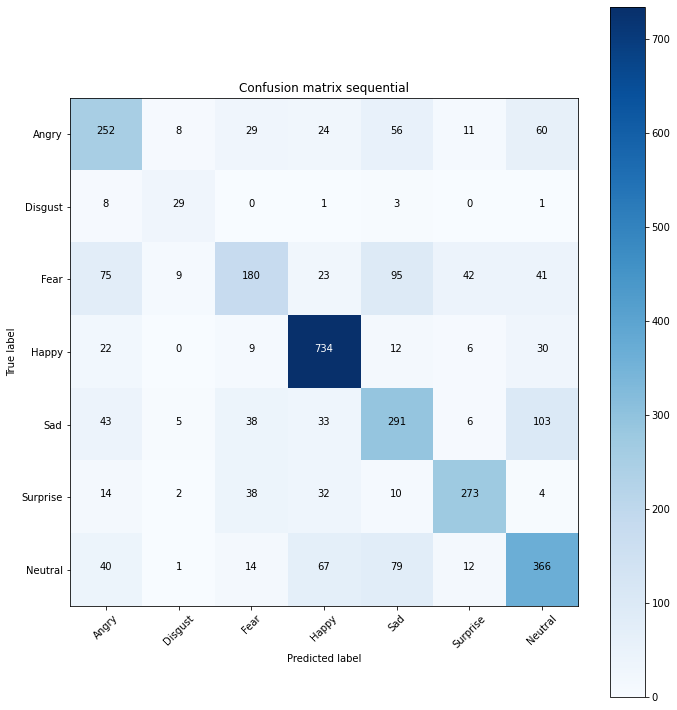

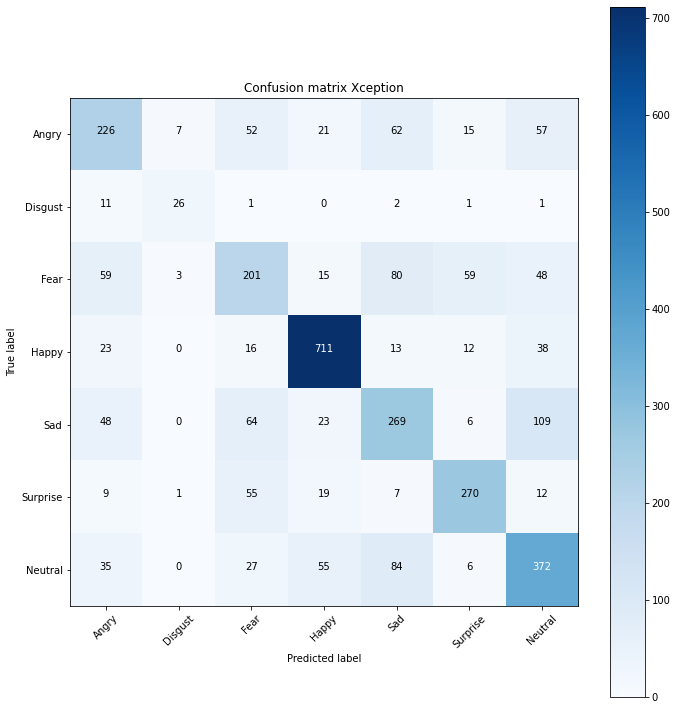

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

# Printing the confusion matrix for each model
for model,i in zip([CNN,xception],[1,2,3]):
    fig = figure(figsize=(10, 10))
    
    ypred=model.predict(xtest)
    rounded_predections=np.argmax(ypred, axis=1)
    rounded_labels=np.argmax(ytest, axis=1)
    cm = confusion_matrix(rounded_labels, rounded_predections)
    labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    title='Confusion matrix '+model.name
    

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion_matrix_'+model.name+'.png')
    plt.show()
    

From the confusion metrix above we observe the emotions that are correctly predicted w.r.t actual emotions. 

In above confusion metrices the **Deep CNN** model has predicted most of the emotions correctly comapare to **Xception model**.

### Now we are going to use the **Trained CNN Model** for live video face emotion recognition.

# **Real Time Video Face Detection Using Local Webcam**

In [ ]:
# Save best Model
CNN.save('Final_model.h5')

In [ ]:
# Saving model in json format along with weights
fer_json = xception.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
xception.save_weights("fer.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image,clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# Defining function to detect face
def face_detect():
  import cv2
  from PIL import Image
  import numpy as np
  import os
  from keras.models import load_model
  from time import sleep
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing import image
# start streaming video from webcam
  video_stream()
# label for video
  label_html = 'Capturing...'
# initialze bounding box to empty
  bbox = ''
  count = 0
  face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/gdrive/MyDrive/Almabetter/Module 6: Deep Learning/Capstone Project-5: Face Emotion Recognition/dat/haarcascade_frontalface_alt.xml') # Face Detection
  classifier =load_model('/content/gdrive/MyDrive/Almabetter/Module 6: Deep Learning/Capstone Project-5: Face Emotion Recognition/dat/Final_model.h5')  #Load model
  emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise'] 

  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
      roi_gray = gray[y:y+h,x:x+w]
      roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction
      if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction
        prediction = classifier.predict(roi)[0]   #Prediction
        label=emotion_labels[prediction.argmax()]
        label_position = (x,y)
        cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
      else:
        cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

    



    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

In [ ]:
# Finally detecting the face with live webcam
face_detect()

<IPython.core.display.Javascript object>

# **Conclusion:**


*   The data preprocessing takes time for processing each image.

*   The Custom trained CNN model gives training accuracy of 77% and test accuracy of 69% which is pretty good compare to the Xception model. 

*   Since, the emotion counts of disgust and fear images are less therefore on local webcam it hardly detect those emotions.

*   The codes which are deployed are on my github repository.

*   It was such an amazing and interesting project. Learnt a lot from this. 


**Heroku WEBAPP Link:** https://face-emotion-recognition-ofg.herokuapp.com/

